In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from scipy import stats
plt.rcParams['figure.figsize']=16,6
import random
random.seed(1429)

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("Churn_Modelling.csv")

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.Exited=df.Exited.astype('category')

In [10]:
df.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [11]:
df.Geography=df.Geography.astype('category')

In [12]:
df.Gender=df.Gender.astype('category')

In [13]:
df.HasCrCard=df.HasCrCard.astype('category')

In [14]:
df.IsActiveMember=df.IsActiveMember.astype('category')

In [15]:
df.NumOfProducts=df.NumOfProducts.astype('category')

In [16]:
df.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [17]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

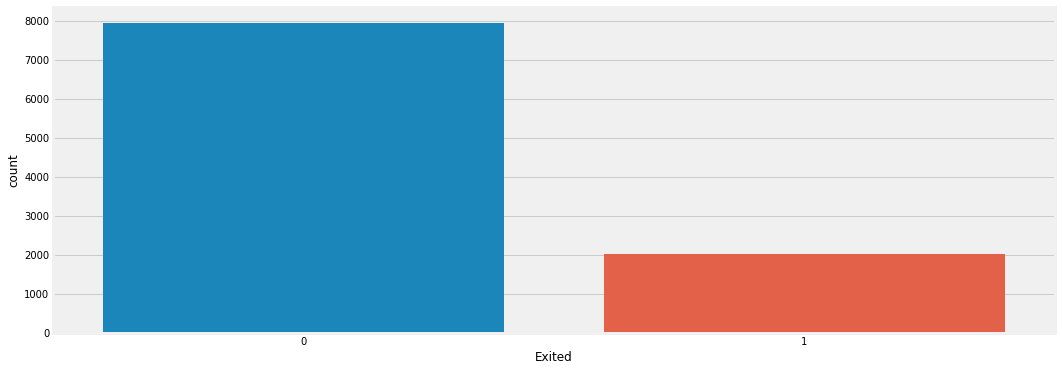

In [18]:
plt.rcParams['figure.figsize']=16,6
sns.countplot(df.Exited)

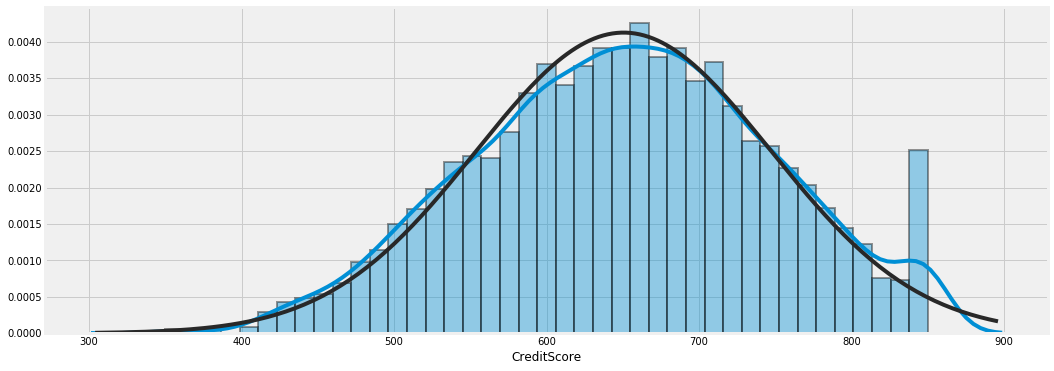

In [19]:
plt.rcParams['figure.figsize']=16,6
sns.distplot(df.CreditScore, hist_kws={'edgecolor':'k','lw':2}, fit=stats.norm)

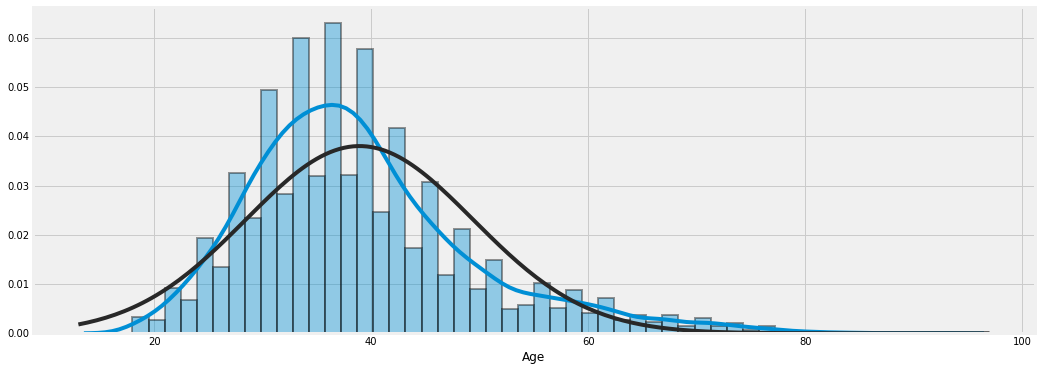

In [20]:
plt.rcParams['figure.figsize']=16,6
sns.distplot(df.Age, hist_kws={'edgecolor':'k','lw':2}, fit=stats.norm)

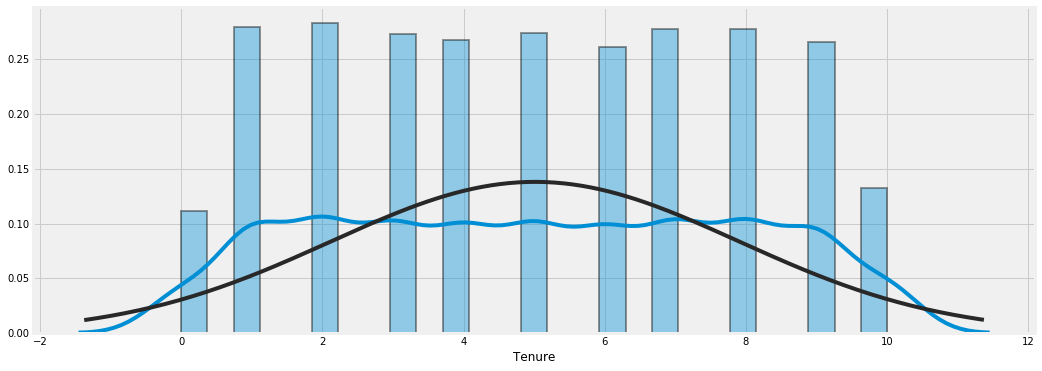

In [21]:
plt.rcParams['figure.figsize']=16,6
sns.distplot(df.Tenure, hist_kws={'edgecolor':'k','lw':2}, fit=stats.norm)

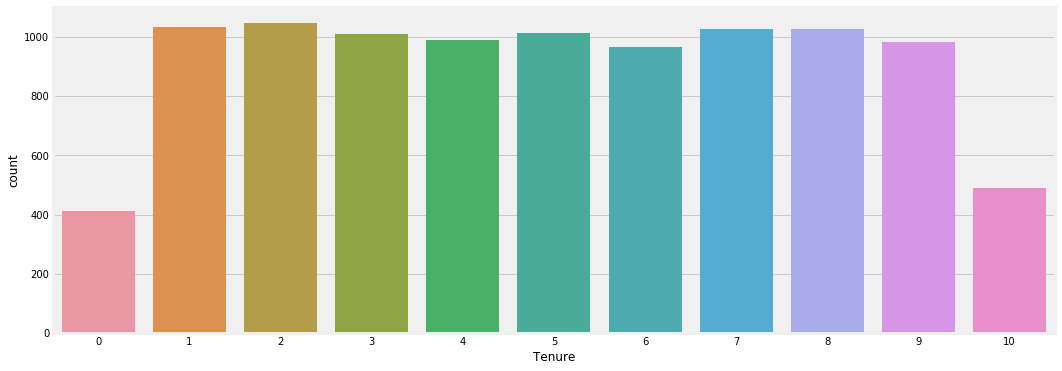

In [22]:
plt.rcParams['figure.figsize']=16,6
sns.countplot(df.Tenure)

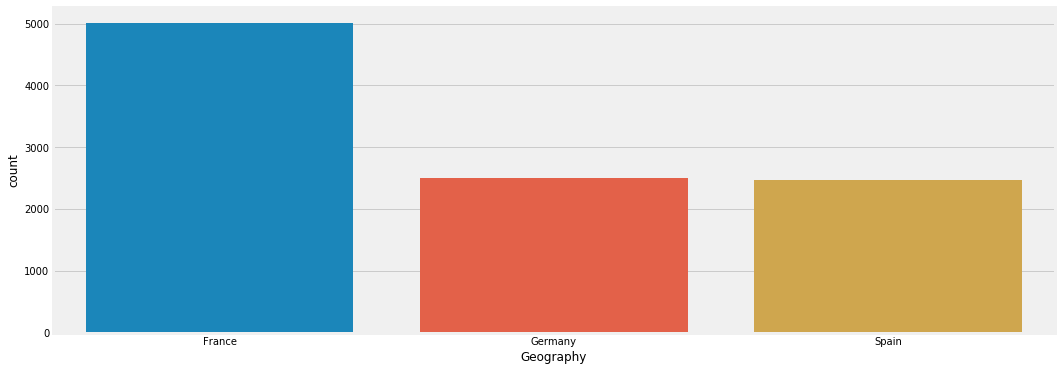

In [23]:
sns.countplot(df.Geography)

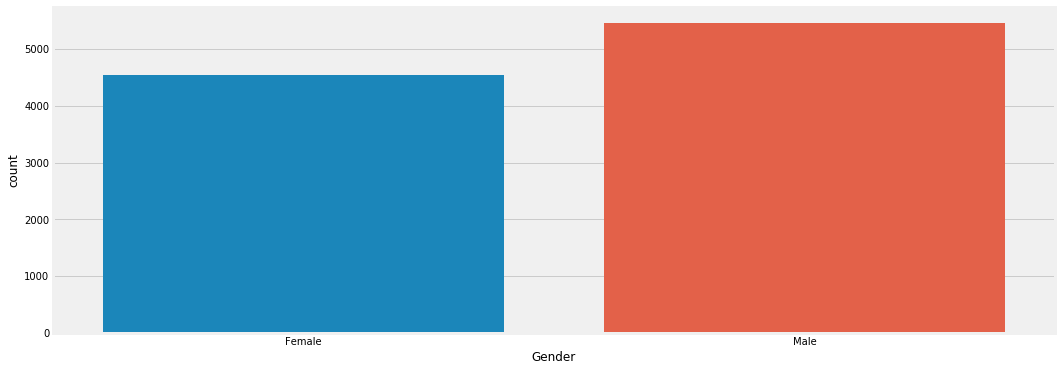

In [24]:
sns.countplot(df.Gender)

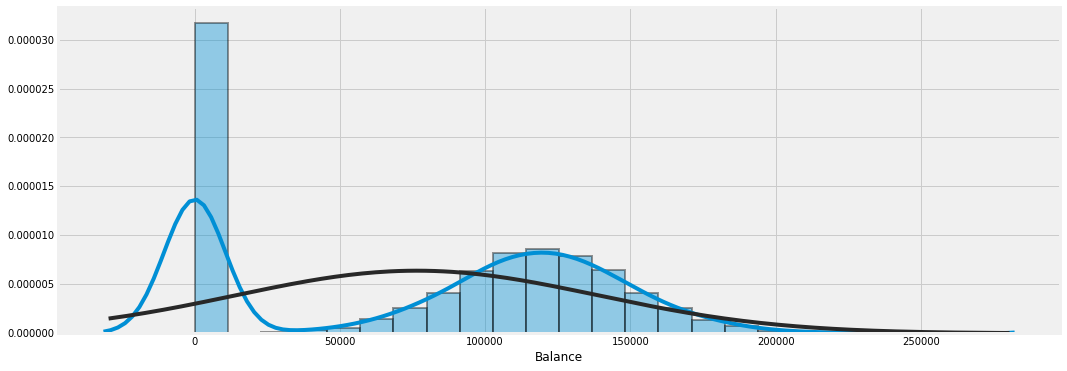

In [25]:
plt.rcParams['figure.figsize']=16,6
sns.distplot(df.Balance, hist_kws={'edgecolor':'k','lw':2}, fit=stats.norm)

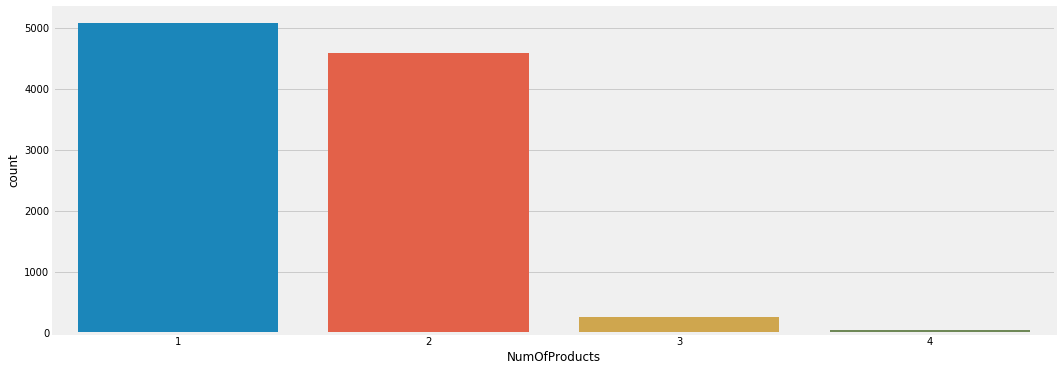

In [26]:
sns.countplot(df.NumOfProducts)

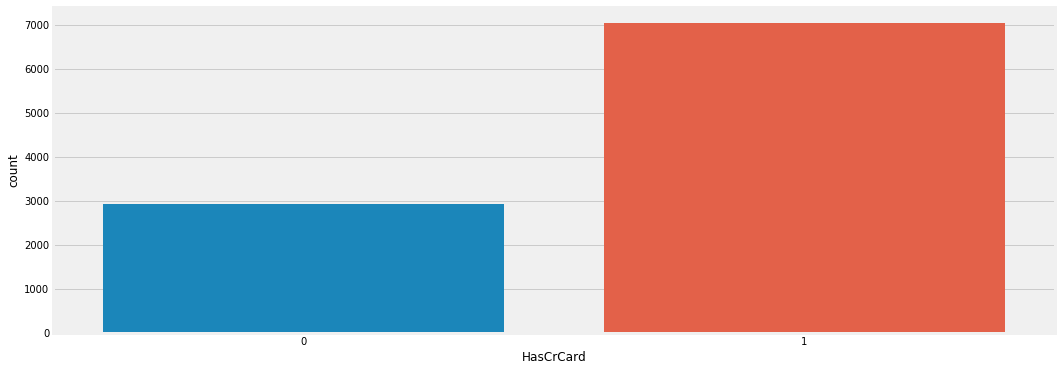

In [27]:
sns.countplot(df.HasCrCard)

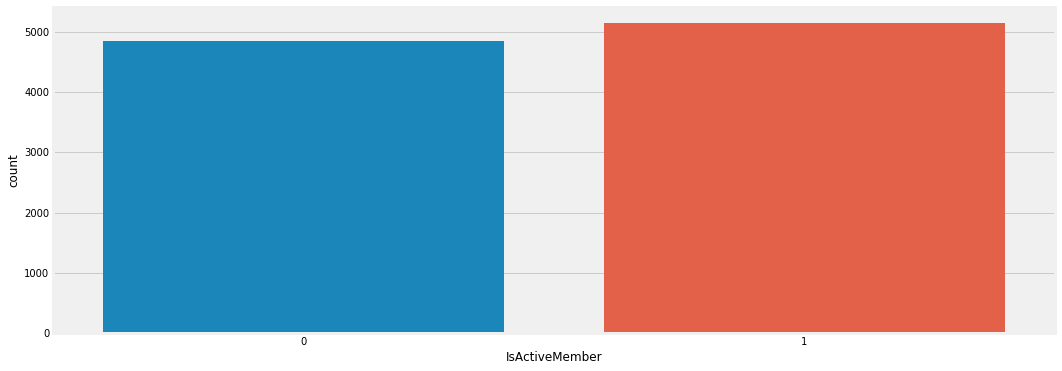

In [28]:
sns.countplot(df.IsActiveMember)

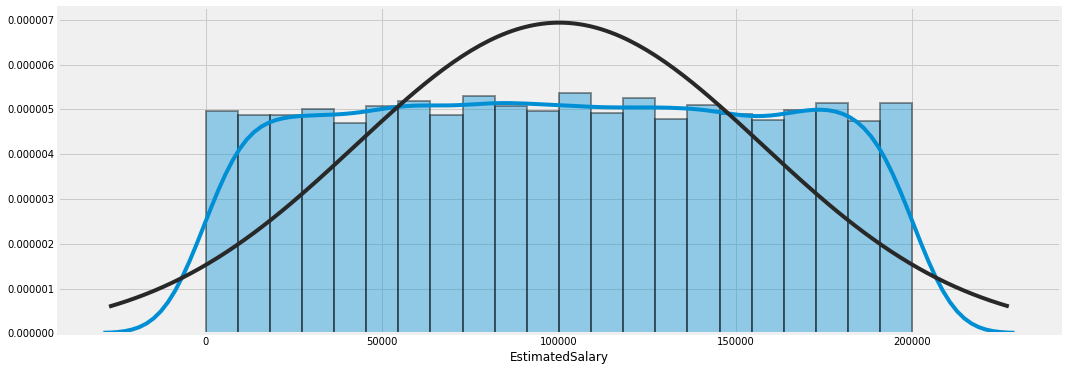

In [29]:
plt.rcParams['figure.figsize']=16,6
sns.distplot(df.EstimatedSalary, hist_kws={'edgecolor':'k','lw':2}, fit=stats.norm)

In [30]:
dum=pd.get_dummies(data=df.loc[:,['Geography','Gender']], drop_first=True)

In [31]:
DF=pd.concat([df.drop(labels=['Geography','Gender'], axis=1), dum], axis=1)

In [32]:
DF.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [33]:
DF.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [34]:
X=DF.loc[:,['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male']]
y=DF.loc[:,'Exited']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(ratio=1.0)

In [37]:
X_train_smt, y_train_smt=smt.fit_sample(X_train, y_train)

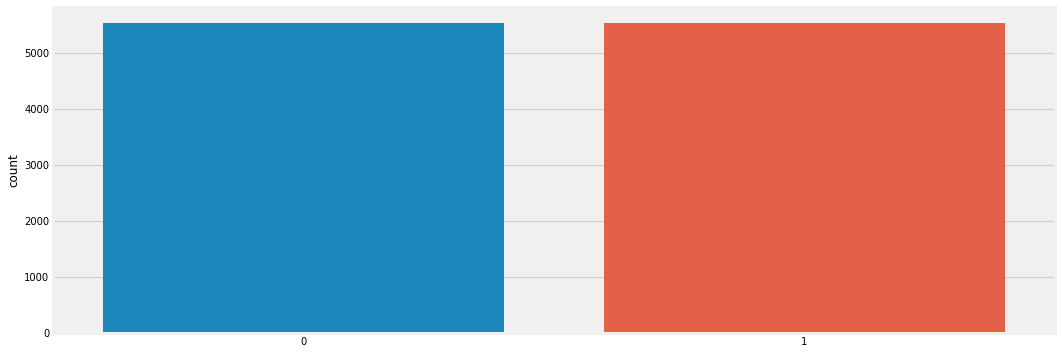

In [38]:
sns.countplot(y_train_smt)

In [39]:
X_train_smt=pd.DataFrame(X_train_smt, columns=X_train.columns)


In [40]:
y_train_smt=pd.DataFrame(y_train_smt, columns=['Exited'])

In [41]:
skl=StandardScaler()

In [42]:
X_train_skl=skl.fit_transform(X_train_smt)
X_test_skl=skl.transform(X_test)

In [43]:
X_train_skl=pd.DataFrame(X_train_skl, columns=X_train.columns)


In [44]:
X_test_skl=pd.DataFrame(X_test_skl, columns=X_test.columns)


In [45]:
classification=Sequential()

1st Hidden Layer

In [46]:
classification.add(Dense(units=6, input_dim=11,activation='relu', kernel_initializer='uniform'))

2nd Hidden Layer

In [47]:
classification.add(Dense(units=6,activation='relu', kernel_initializer='uniform'))

output layer

In [48]:
classification.add(Dense(units=1,activation='sigmoid', kernel_initializer='uniform'))

compiling the ANN/ / using SGD

In [49]:
classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the ANN

In [50]:
classification.fit(X_train_skl, y_train_smt,batch_size=10, epochs=100 )

Epoch 1/100
11094/11094 [==============================] - 1s 96us/step - loss: 0.5798 - accuracy: 0.7040
Epoch 2/100
11094/11094 [==============================] - 1s 90us/step - loss: 0.5148 - accuracy: 0.7544
Epoch 3/100
11094/11094 [==============================] - 1s 93us/step - loss: 0.4931 - accuracy: 0.7685
Epoch 4/100
11094/11094 [==============================] - 1s 93us/step - loss: 0.4819 - accuracy: 0.7745
Epoch 5/100
11094/11094 [==============================] - 1s 97us/step - loss: 0.4754 - accuracy: 0.7729
Epoch 6/100
11094/11094 [==============================] - 1s 93us/step - loss: 0.4702 - accuracy: 0.7780
Epoch 7/100
11094/11094 [==============================] - 1s 90us/step - loss: 0.4608 - accuracy: 0.7826
Epoch 8/100
11094/11094 [==============================] - 1s 98us/step - loss: 0.4504 - accuracy: 0.7882
Epoch 9/100
11094/11094 [==============================] - 1s 94us/step - loss: 0.4405 - accuracy: 0.7956
Epoch 10/100
11094/11094 [====================

11094/11094 [==============================] - 1s 98us/step - loss: 0.3607 - accuracy: 0.8384
Epoch 78/100
11094/11094 [==============================] - 1s 97us/step - loss: 0.3601 - accuracy: 0.8380
Epoch 79/100
11094/11094 [==============================] - 1s 106us/step - loss: 0.3602 - accuracy: 0.8385
Epoch 80/100
11094/11094 [==============================] - 1s 103us/step - loss: 0.3599 - accuracy: 0.8367
Epoch 81/100
11094/11094 [==============================] - 1s 101us/step - loss: 0.3588 - accuracy: 0.83670s
Epoch 82/100
11094/11094 [==============================] - 1s 98us/step - loss: 0.3582 - accuracy: 0.8419
Epoch 83/100
11094/11094 [==============================] - 1s 105us/step - loss: 0.3592 - accuracy: 0.8396
Epoch 84/100
11094/11094 [==============================] - 1s 103us/step - loss: 0.3572 - accuracy: 0.8392
Epoch 85/100
11094/11094 [==============================] - 1s 102us/step - loss: 0.3581 - accuracy: 0.8380
Epoch 86/100
11094/11094 [================

In [51]:
y_pred=classification.predict(X_test_skl)

In [52]:
pred=[]
for i in y_pred:
    if i >0.5:
        pred.append(1)
    else:
        pred.append(0)

In [53]:
pred=pd.Series(pred)

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2416
           1       0.50      0.70      0.58       584

    accuracy                           0.80      3000
   macro avg       0.71      0.76      0.73      3000
weighted avg       0.84      0.80      0.81      3000



In [55]:
print(confusion_matrix(y_test, pred))

[[2003  413]
 [ 178  406]]


In [56]:
new_c=np.array(skl.transform([[600,30,3,60000,2,1,1,50000,0,0,1]]))

In [57]:
p=classification.predict(new_c)

In [58]:
p>0.5

array([[False]])

In [59]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [60]:
def build_classifier():
    classification=Sequential()
    classification.add(Dense(units=6, input_dim=11,activation='relu', kernel_initializer='uniform'))
    classification.add(Dense(units=6,activation='relu', kernel_initializer='uniform'))
    classification.add(Dense(units=1,activation='sigmoid', kernel_initializer='uniform'))
    classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classification

In [61]:
classifier=KerasClassifier(build_fn=build_classifier, batch_size=10, epochs=100 ) 

In [62]:
accuracies=cross_val_score(estimator=classifier, X=X_train_skl, y=y_train_smt, n_jobs=4, cv=10, scoring='accuracy')

In [69]:
print(f"CV accuracy {accuracies.mean():.2f}")

CV accuracy 0.83


In [76]:
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV

In [77]:
def build_classifier(optimizer):
    classification=Sequential()
    classification.add(Dense(units=6, input_dim=11,activation='relu', kernel_initializer='uniform'))
    classification.add(Dropout(rate=0.1))
    classification.add(Dense(units=6,activation='relu', kernel_initializer='uniform'))
    classification.add(Dropout(rate=0.1))
    classification.add(Dense(units=1,activation='sigmoid', kernel_initializer='uniform'))
    classification.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classification

In [78]:
classifier=KerasClassifier(build_fn=build_classifier) 

In [79]:
param={'batch_size':[32,64], 'epochs':[100,500], 'optimizer':['adam','rmsprop'] }

In [80]:
gd_cv=GridSearchCV(estimator=classifier, param_grid=param, n_jobs=4, cv=10, return_train_score=True, scoring='accuracy')

In [81]:
gd_cv.fit(X_train_skl, y_train_smt)

C:\Users\bishw\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/500
11094/11094 [==============================] - 0s 36us/step - loss: 0.6325 - accuracy: 0.6751
Epoch 2/500
11094/11094 [==============================] - 0s 25us/step - loss: 0.5577 - accuracy: 0.7295
Epoch 3/500
11094/11094 [==============================] - 0s 25us/step - loss: 0.5460 - accuracy: 0.7381
Epoch 4/500
11094/11094 [==============================] - 0s 25us/step - loss: 0.5339 - accuracy: 0.7414
Epoch 5/500
11094/11094 [==============================] - 0s 25us/step - loss: 0.5292 - accuracy: 0.7499
Epoch 6/500
11094/11094 [==============================] - 0s 25us/step - loss: 0.5279 - accuracy: 0.7441
Epoch 7/500
11094/11094 [==============================] - 0s 25us/step - loss: 0.5204 - accuracy: 0.7516
Epoch 8/500
11094/11094 [==============================] - 0s 25us/step - loss: 0.5210 - accuracy: 0.7509 0s - loss: 0.5288 - accura
Epoch 9/500
11094/11094 [==============================] - 0s 25us/step - loss: 0.5207 - accuracy: 0.7528
Epoch 10/500
11094/

11094/11094 [==============================] - 0s 26us/step - loss: 0.4617 - accuracy: 0.7813
Epoch 78/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4616 - accuracy: 0.7847
Epoch 79/500
11094/11094 [==============================] - 0s 26us/step - loss: 0.4648 - accuracy: 0.7826
Epoch 80/500
11094/11094 [==============================] - 0s 26us/step - loss: 0.4610 - accuracy: 0.7841
Epoch 81/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4598 - accuracy: 0.7846
Epoch 82/500
11094/11094 [==============================] - 0s 26us/step - loss: 0.4584 - accuracy: 0.7824
Epoch 83/500
11094/11094 [==============================] - 0s 26us/step - loss: 0.4596 - accuracy: 0.7861
Epoch 84/500
11094/11094 [==============================] - 0s 26us/step - loss: 0.4692 - accuracy: 0.7802
Epoch 85/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4592 - accuracy: 0.7862
Epoch 86/500
11094/11094 [========================

11094/11094 [==============================] - 0s 31us/step - loss: 0.4613 - accuracy: 0.7872
Epoch 154/500
11094/11094 [==============================] - 0s 26us/step - loss: 0.4637 - accuracy: 0.7820
Epoch 155/500
11094/11094 [==============================] - 0s 34us/step - loss: 0.4540 - accuracy: 0.7913
Epoch 156/500
11094/11094 [==============================] - 0s 29us/step - loss: 0.4583 - accuracy: 0.7892
Epoch 157/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4568 - accuracy: 0.7877
Epoch 158/500
11094/11094 [==============================] - 0s 26us/step - loss: 0.4563 - accuracy: 0.7880
Epoch 159/500
11094/11094 [==============================] - 0s 26us/step - loss: 0.4587 - accuracy: 0.7856
Epoch 160/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4616 - accuracy: 0.7870
Epoch 161/500
11094/11094 [==============================] - 0s 26us/step - loss: 0.4628 - accuracy: 0.7868
Epoch 162/500
11094/11094 [===============

Epoch 229/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4552 - accuracy: 0.7875
Epoch 230/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4518 - accuracy: 0.7923
Epoch 231/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4539 - accuracy: 0.7916
Epoch 232/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4557 - accuracy: 0.7890
Epoch 233/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4595 - accuracy: 0.7911
Epoch 234/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4553 - accuracy: 0.7891
Epoch 235/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4554 - accuracy: 0.7923
Epoch 236/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4626 - accuracy: 0.7860
Epoch 237/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4563 - accuracy: 0.7904
Epoch 238/500
11094/11094 [=

11094/11094 [==============================] - 0s 28us/step - loss: 0.4610 - accuracy: 0.7860
Epoch 305/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4540 - accuracy: 0.7946
Epoch 306/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4534 - accuracy: 0.7895
Epoch 307/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4593 - accuracy: 0.7875
Epoch 308/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4562 - accuracy: 0.7891
Epoch 309/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4522 - accuracy: 0.7919
Epoch 310/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4547 - accuracy: 0.7926
Epoch 311/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4516 - accuracy: 0.7929
Epoch 312/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4525 - accuracy: 0.7952
Epoch 313/500
11094/11094 [===============

Epoch 380/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4557 - accuracy: 0.7923
Epoch 381/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4520 - accuracy: 0.7927
Epoch 382/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4477 - accuracy: 0.7963
Epoch 383/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4533 - accuracy: 0.7893
Epoch 384/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4524 - accuracy: 0.7957
Epoch 385/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4493 - accuracy: 0.7936
Epoch 386/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4568 - accuracy: 0.7871
Epoch 387/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4472 - accuracy: 0.7939
Epoch 388/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4510 - accuracy: 0.7929
Epoch 389/500
11094/11094 [=

11094/11094 [==============================] - 0s 28us/step - loss: 0.4543 - accuracy: 0.7940
Epoch 456/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4534 - accuracy: 0.7897
Epoch 457/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4571 - accuracy: 0.7914
Epoch 458/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4513 - accuracy: 0.7953
Epoch 459/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4441 - accuracy: 0.7980
Epoch 460/500
11094/11094 [==============================] - 0s 28us/step - loss: 0.4544 - accuracy: 0.7912
Epoch 461/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4534 - accuracy: 0.7920
Epoch 462/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4496 - accuracy: 0.7957
Epoch 463/500
11094/11094 [==============================] - 0s 27us/step - loss: 0.4514 - accuracy: 0.7922
Epoch 464/500
11094/11094 [===============

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000020FBD4834C8>,
             iid='warn', n_jobs=4,
             param_grid={'batch_size': [32, 64], 'epochs': [100, 500],
                         'optimizer': ['adam', 'rmsprop']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [82]:
gd_cv.best_params_

{'batch_size': 32, 'epochs': 500, 'optimizer': 'adam'}

In [83]:
gd_cv.best_score_

0.8181900126194339

In [84]:
gd_cv_pred=gd_cv.predict(X_test_skl)

In [85]:
pred=[]
for i in gd_cv_pred:
    if i >0.5:
        pred.append(1)
    else:
        pred.append(0)

In [86]:
pred=pd.Series(pred)

In [87]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2416
           1       0.49      0.72      0.58       584

    accuracy                           0.80      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.84      0.80      0.81      3000



In [88]:
print(confusion_matrix(y_test, pred))

[[1970  446]
 [ 161  423]]
